In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

# 1. User Input

## 1.1 Import and format Pareto optimal solutions

Import optimisation results (Pareto set)

In [2]:
opdata = pd.read_pickle("Data/opdata")

Import normalised (0 best, 1 worst) objective function data

In [3]:
normobjdf = pd.read_pickle("Data/normobjdf")

Create dataframe of data to be plotted (select columns)

In [4]:
# remember due to Python numbering to start at zero end one column after that which you want
plotdf = pd.DataFrame(opdata, columns = [opdata.columns[0:19]])

Rename columns to better fit in plot

In [5]:
print plotdf.columns

Index([u'NPI2 Threshold', u'NPI2 Flow Threshold', u'NPI Threshold',
       u'NPI Flow Threshold', u'Brisbane to Nth Pine Threshold',
       u'Brisbane to Nth Pine Flow Threshold', u'Maroochy to Baroon Threshold',
       u'Ewen Maddock to Baroon Threshold', u'EPI Threshold',
       u'EPI Flow Threshold', u'SPI Threshold', u'SPI Flow Threshold',
       u'PRW Threshold', u'Desalination 1/3 Production Threshold',
       u'Desalination 2/3 Production Threshold',
       u'Desalination Full Production Threshold', u'Total Spill Volume (GL)',
       u'Minimum System Storage (GL)', u'Total Cost ($ million)'],
      dtype='object')


In [6]:
replacementcolumns = ['NPI2', 'NPI2 Flow', 'NPI', 'NPI Flow', 
                      'Brisbane to Nth Pine', 'Brisb. to Nth Pine Flow', 
                      'Maroochy to Baroon', 'Ewen Maddock to Baroon', 
                      'EPI', 'EPI Flow', 'SPI Threshold', 'SPI Flow',
                      'PRW', 'Desal 1/3 Production', 'Desal 2/3 Production',
                      'Desalination Full Production', 'Total Spill (GL)',
                      'Minimum Storage (GL)', 'Total Cost ($ million)']

In [7]:
for i in range(len(plotdf.columns)):
    plotdf.rename(columns={plotdf.columns[i]:replacementcolumns[i]}, inplace=True)

Create dataframe of ticks for plotting

In [8]:
ticks = {}
for i in range(0, 16): # decision variables
    ticks[plotdf.columns[i]] = [0,0.2,0.4,0.6,0.8,1.0]
ticks[plotdf.columns[16]] = [350,450,550] # obj 1 
ticks[plotdf.columns[17]] = [150,250,350,450] # obj3
ticks[plotdf.columns[18]] = [5200,5300,5400,5500] # obj2

## 1.2 Import cluster membership information

In [9]:
clusternos = pd.read_pickle('Data/clusternos')

## 1.3 Specify cluster colours

Create colour map for clusters (add colours to taste, and depending on number of clusters)

In [10]:
clustcols = pd.read_pickle("Data/clustercolours")

Enter list of colours, for each decision option (based on cluster membership)

In [11]:
clustcollist = pd.read_pickle("Data/clustcollist")

# 2. Functions

## 2.1 Function to sum normalised objective performance for level diagram

Input: 1-normalised dataframe of objective functions (0 best, 1 worst)

In [12]:
def lev1norm(normdf):
    lev1norm = []
    for i in range(0, len(normdf)):
        lev1norm.append(sum(normdf.ix[i]))
    lev1normdf = pd.DataFrame({'1-norm': lev1norm})
    return lev1normdf

## 2.2 Function to determine number of rows and columns of subplots

Creates a list showing dimensions (rows and columns) of subplots, for a given number of plots. Columns is given the greater of two dimensions, where relevant.

In [13]:
def dimensions(numplots):
    cols = int(numplots**0.5) + (numplots % numplots**0.5 > 0) # rounds up the square root of numplots
    rows = int(numplots/cols) + (numplots % cols > 0) # rounds up the numplots divided by num cols
    return [rows, cols]

# 3. Execution

## 3.1 Determine 1-norm

Apply 1-norm function to obtain dataframe of 1-norm values

In [14]:
objs1norm = lev1norm(normobjdf)

## 3.2 Plot level diagram

Plot of objectives and decision variables against 1-norm

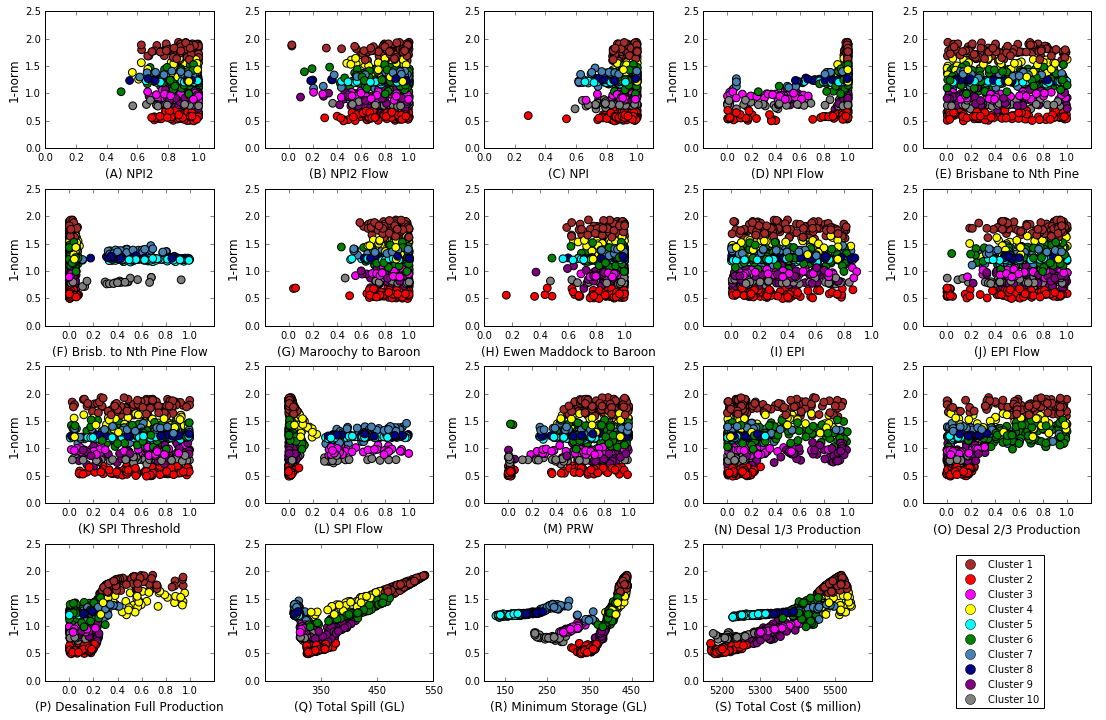

In [15]:
numplots = len(plotdf.columns)
dims = dimensions(numplots + 1) # add one for space for legend

fig = plt.figure(figsize = [dims[1]*3*1.25, dims[0]*3]) 
    #figsize adjusted for extra wspace between plots to alow for long xlabels
fig.subplots_adjust(wspace=0.3, hspace = 0.3)

#create alphabet for enumerating subplots
letter = map(chr, range(65, 65+len(plotdf.columns)))

for i in range(0, numplots):
    column = plotdf.columns[i]
    ax = fig.add_subplot(dims[0], dims[1], i+1)
    ax.scatter(abs(plotdf[column]), objs1norm[objs1norm.columns[0]], s = 60, c = clustcollist, marker = 'o')
    ax.set_xlabel('(%s) %s' % (letter[i], column), fontsize = 'large')
    ax.set_ylabel(objs1norm.columns[0], fontsize = 'large')
    ax.set_xticks(ticks[column])
    
# add subplot space for legend
axleg = fig.add_subplot(dims[0], dims[1], numplots + 1)
axleg.axis('off')

# create legend for clusters with points (coloured circles) and labels (cluster number)
legpts = []    
leglabs = []
for i in range(0, max(clusternos[clusternos.columns[0]])):
    legpt = mpl.lines.Line2D([0], [0], marker = 'o', ms = 10, color = clustcols[i], linestyle = 'none')
    legpts.append(legpt)
    leglab = 'Cluster %d' % (i + 1)
    leglabs.append(leglab)
axleg.legend(legpts, leglabs, numpoints = 1, loc = [0.2, -0.2], fontsize = 'medium')
    
plt.savefig('Level Diagram/leveldiagram.png', dpi = 100, bbox_inches = 'tight')

In [16]:
plt.close(fig)

# 4. Find index of minimum 1-norm for shortlist

In [19]:
print objs1norm.idxmin()
#note: add 1 to have a 1-indexed number

1-norm    471
dtype: int64
